In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [5]:
df=pd.read_csv("./Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df=df.drop("User ID",axis=1)

**Splitting the dataset into the Training set and Test set**

In [6]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.drop(["Gender","Purchased"],axis=1)
y=df["Purchased"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [15]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [16]:
minmax.fit(x_train)

x_train_scaled=minmax.fit_transform(x_train)
x_test_scaled=minmax.fit_transform(x_test)

**Fitting K-NN to the Training set**

In [21]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [24]:
train=[]
test=[]
for i in range(2,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    train.append(cross_val_score(knn,x_train_scaled,y_train,cv=10).mean())
    test.append(knn.score(x_test_scaled,y_test))

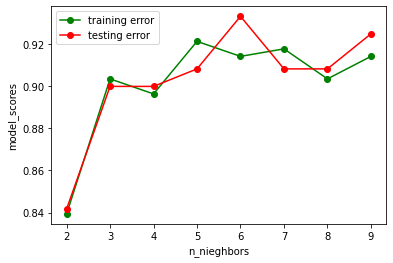

In [25]:
plt.plot(range(2,10),train,label="training error",marker="o",color="green")
plt.plot(range(2,10),test,label="testing error",marker="o",color="red")
plt.xlabel("n_nieghbors")
plt.ylabel("model_scores")
plt.legend()
plt.show()

In [26]:
# taking n=7 as it has low bias and low variance and has high accuracy
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_scaled,y_train)


KNeighborsClassifier(n_neighbors=7)

**Predicting the Test set results**

In [27]:
y_pred=knn.predict(x_test_scaled)

**Making the Confusion Matrix**

In [28]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


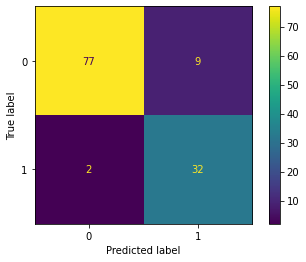

In [29]:
plot_confusion_matrix(knn,x_test_scaled,y_test)